In [3]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("/root/lab/KerasTest/Applications/applications/autoqnn/")
import autoqnn

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


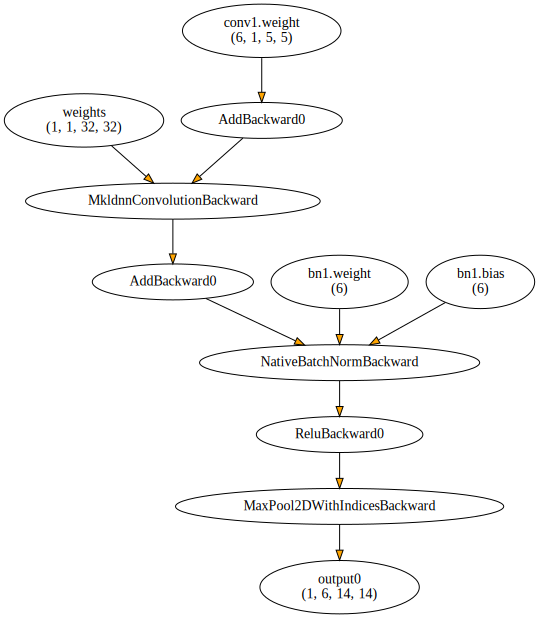

In [4]:
from torch import nn
from autoqnn.utils import view_module
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.bn1 = nn.BatchNorm2d(6) # 1 input image channel, 6 output channels, 5x5 square convolution kernel

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.bn1(self.conv1(x))), (2, 2)) # Max pooling over a (2, 2) window
        return x
    
module = Net()
q_model = autoqnn.core.convert(module,
                               quantize_config_dict={
                                   "weight_quant":autoqnn.quantizers.FixedQuant(bitwidth=4),
                                   "act_quant":autoqnn.quantizers.FixedQuantAct(bitwidth=4)})
nodes,edges,dot=autoqnn.utils.view_module(q_model,(1,1,32,32))
dot

In [5]:
q_model

Net(
  (conv1): Conv2d(
    1, 6, kernel_size=(5, 5), stride=(1, 1), bias=False
    (bias_quant): Quantization()
    (weight_quant): FixedQuant()
    (act_quant): FixedQuantAct()
  )
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [28]:
import base64
import cv2
img = cv2.imread('Net.png.png')
img = cv2.resize(img,dsize=(600,500))
cv2.imwrite("Net.png",img)

True

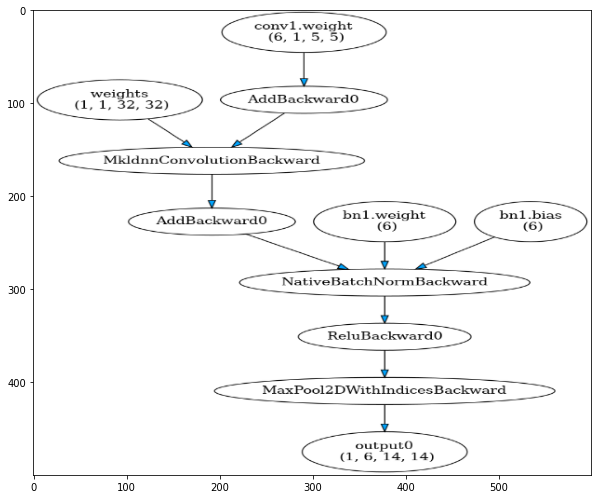

In [29]:
# img.shape
plt.figure(figsize=(10,20))
plt.imshow(img)
# base64.b64encode(img.tobytes())

In [ ]:
with open('Net.png.png','rb') as f:#二进制方式打开图文件
    ls_f=base64.b64encode(f.read()) #读取文件内容，转换为base64编码
ls_f

In [1]:
import sys
sys.path.append("")

In [7]:
def docker_id_read(ID_file):
    with open(ID_file,'r') as f:
        ids = f.read().split()
    return ids
def docker_id_write(ids,ID_file):
    with open(ID_file,'w') as f:
        for i in ids:
            f.write(i)
def docker_exist(index):
    ids = 
    
ids = docker_id_read(".ID_file")
docker_id_write(ids,".ID_file")
ids

SyntaxError: invalid syntax (<ipython-input-7-ee7389da82d8>, line 10)

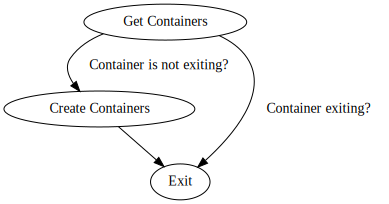

In [21]:
from graphviz import Digraph
g = Digraph('G', filename='hello.gv')
g.node('node1', label='Get Containers')
g.node('node2', label='Create Containers')
g.node('node3', label='Exit')
# g.node('node2', label='World')
g.edge('node1', 'node2',"Container is not exiting?")
g.edge('node1', 'node3',"Container exiting?")
g.edge('node2', 'node3')
g
# g.view()
# digraph G {
#     main [shape=box];
#     main -> parse [weight=8];
#     parse-> execute;
#     main -> init [style=dotted, dir = none];
#     main -> cleanup [dir = both];
#     execute -> {make_string, printf};
#     init -> make_string;
#     edge [color=red];
#     main -> printf [style=bold, label="100 times"];
#     make_string [label = "make a\nstring"];
#     node [shape=box, style=filled,color=".7, .3, 1.0", fontname="Microsoft Yahei"];
#     execute -> 比较;
# }

In [14]:
help(g.edge)

Help on method edge in module graphviz.dot:

edge(tail_name, head_name, label=None, _attributes=None, **attrs) method of graphviz.dot.Digraph instance
    Create an edge between two nodes.
    
    Args:
        tail_name: Start node identifier (format: ``node[:port[:compass]]``).
        head_name: End node identifier (format: ``node[:port[:compass]]``).
        label: Caption to be displayed near the edge.
        attrs: Any additional edge attributes (must be strings).
    
    Note:
        The ``tail_name`` and ``head_name`` strings are separated by
        (optional) colon(s) into ``node`` name, ``port`` name, and
        ``compass`` (e.g. ``sw``).
        See :ref:`details in the User Guide <ports>`.



给你一个长度固定的整数数组 arr，请你将该数组中出现的每个零都复写一遍，并将其余的元素向右平移。  注意：请不要在超过该数组长度的位置写入元素。 要求：请对输入的数组 就地 进行上述修改，不要从函数返回任何东西。  

输入：[1,0,2,3,0,4,5,0] 输出：null 解释：调用函数后，输入的数组将被修改为：[1,0,0,2,3,0,0,4]


In [4]:
class Solution():
    def repeat_zero(self, arr):
        zero_num=0
        for i in range(len(arr)-1,-1,-1):
            if arr[i] == 0 and i!=len(arr)-1:
                j=len(arr)-1
                while j>=i+1:
                    arr[j]=arr[j-1]
                    j-=1
                arr[i+1]=0
    
    def repeat_zero2(self, arr):
        for i in range(len(arr)-1,-1,-1):
            if arr[i] == 0 and i!=len(arr)-1:
                j=len(arr)-1
                while j>=i+1:
                    arr[j]=arr[j-1]
                    j-=1
                arr[i+1]=0
    
s = Solution()
arr=[1,0,2,3,0,4,5,0]
s.repeat_zero(arr)
arr

[1, 0, 0, 2, 3, 0, 0, 4]